In [1]:
#import libraries
import numpy as np
import pandas as pd
import hvplot.pandas
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#bring in dataset
usda_data = Path("./proj_2_team3.csv")
usda = pd.read_csv(usda_data)

usda.head()

,State-County FIPS,Active Loans,Average Borrower Gross Income,Very Low Income,Low Income,Moderate Income,Average Debt Ratio,American Indian/\nAlaskan Native,Asian,Black/\nAfrican-America,...,Unknown HSG Proj Type,Detached Structure,Attached Structure,Unknown Stucture,Manufactured Homes,Average Living Area (Square Ft),Average Request Amount,Average Loan Amount,Average LTV,Average Appraised Value
0,1001,123,"54,069.98",1,10,111,0.35,0,0,11,...,3,119,1,3,0,"1,608","141,430.75","140,690.34",0.98,"143,260.25"
1,1003,"1,300","53,844.14",14,122,"1,142",0.36,4,2,76,...,46,"1,241",13,46,1,"1,688","132,843.54","131,807.31",1.00,"133,171.71"
2,1005,67,"44,365.34",5,14,48,0.36,0,0,25,...,4,63,0,4,0,"1,518","101,446.28","101,311.15",0.96,"105,179.10"
3,1007,83,"52,175.29",3,6,73,0.34,0,0,11,...,2,80,1,2,0,"1,413","109,024.70","108,577.41",0.97,"112,278.05"
4,1009,579,"51,319.76",6,78,486,0.34,2,3,7,...,20,551,8,20,0,"1,445","115,258.32","114,486.41",0.98,"116,973.32"


In [3]:
#remove columns that are not needed
usda = usda.drop(columns=                  
                 ['Very Low Income', 'Low Income', 'Moderate Income', 'American Indian/\nAlaskan Native', 
                  'Asian', 'Black/\nAfrican-America', 'Hawaiian/Pacific Islander','White', 'Hispanic', 'First Time Home Buyer',
                  'Unknown Stucture','Average Request Amount', 'Unknown  HSG Proj Type', 'Active Loans', 'Average Borrower Age',
                 'Average Debt Ratio', 'PUD', 'Average LTV', 'Coop', 'Condo', 'Manufactured Homes', 'Disability',],axis=1)

                        

In [4]:
usda.head()

,State-County FIPS,Average Borrower Gross Income,Married,Average No of Depend,Average Hshld Size,Detached Structure,Attached Structure,Average Living Area (Square Ft),Average Loan Amount,Average Appraised Value
0,1001,"54,069.98",56,0.8,2.1,119,1,"1,608","140,690.34","143,260.25"
1,1003,"53,844.14",615,0.7,2.2,"1,241",13,"1,688","131,807.31","133,171.71"
2,1005,"44,365.34",25,0.9,2.1,63,0,"1,518","101,311.15","105,179.10"
3,1007,"52,175.29",38,0.7,2.1,80,1,"1,413","108,577.41","112,278.05"
4,1009,"51,319.76",274,0.7,2.1,551,8,"1,445","114,486.41","116,973.32"


In [5]:
#drop null values
usda = usda.dropna()
usda

,State-County FIPS,Average Borrower Gross Income,Married,Average No of Depend,Average Hshld Size,Detached Structure,Attached Structure,Average Living Area (Square Ft),Average Loan Amount,Average Appraised Value
0,1001,"54,069.98",56,0.8,2.1,119,1,"1,608","140,690.34","143,260.25"
1,1003,"53,844.14",615,0.7,2.2,"1,241",13,"1,688","131,807.31","133,171.71"
2,1005,"44,365.34",25,0.9,2.1,63,0,"1,518","101,311.15","105,179.10"
3,1007,"52,175.29",38,0.7,2.1,80,1,"1,413","108,577.41","112,278.05"
4,1009,"51,319.76",274,0.7,2.1,551,8,"1,445","114,486.41","116,973.32"
...,...,...,...,...,...,...,...,...,...,...
3145,72153,"30,076.57",102,0.5,1.5,188,2,"1,060","86,391.18","108,770.87"
3146,78010,"45,773.42",47,0.5,1.0,45,10,"1,192","98,783.60","135,043.55"
3147,78020,"35,594.00",0,0.3,1.3,4,1,904,"68,383.33","307,000.00"
3148,78030,"50,152.09",21,0.3,0.9,11,1,"1,101","101,912.79","158,409.09"


In [6]:
usda.columns

Index(['State-County FIPS', 'Average Borrower Gross Income', 'Married',
       'Average No of Depend', 'Average Hshld Size', 'Detached Structure',
       'Attached Structure', 'Average Living Area (Square Ft)',
       'Average Loan Amount', 'Average Appraised Value'],
      dtype='object')

In [7]:
#remove special characters to fit and scale data
for column in usda.columns:
    usda[column] = usda[column].replace('[\,]','',regex=True)
    
print(usda)

      State-County FIPS Average Borrower Gross Income Married  \
0                  1001                      54069.98      56   
1                  1003                      53844.14     615   
2                  1005                      44365.34      25   
3                  1007                      52175.29      38   
4                  1009                      51319.76     274   
...                 ...                           ...     ...   
3145              72153                      30076.57     102   
3146              78010                      45773.42      47   
3147              78020                      35594.00       0   
3148              78030                      50152.09      21   
3149              88888                      92142.00       8   

      Average No of Depend  Average Hshld Size Detached Structure  \
0                      0.8                 2.1                119   
1                      0.7                 2.2               1241   
2           

In [8]:
#bring in new table with special characters removed
usda.head()

,State-County FIPS,Average Borrower Gross Income,Married,Average No of Depend,Average Hshld Size,Detached Structure,Attached Structure,Average Living Area (Square Ft),Average Loan Amount,Average Appraised Value
0,1001,54069.98,56,0.8,2.1,119,1,1608,140690.34,143260.25
1,1003,53844.14,615,0.7,2.2,1241,13,1688,131807.31,133171.71
2,1005,44365.34,25,0.9,2.1,63,0,1518,101311.15,105179.10
3,1007,52175.29,38,0.7,2.1,80,1,1413,108577.41,112278.05
4,1009,51319.76,274,0.7,2.1,551,8,1445,114486.41,116973.32


<Axes: >

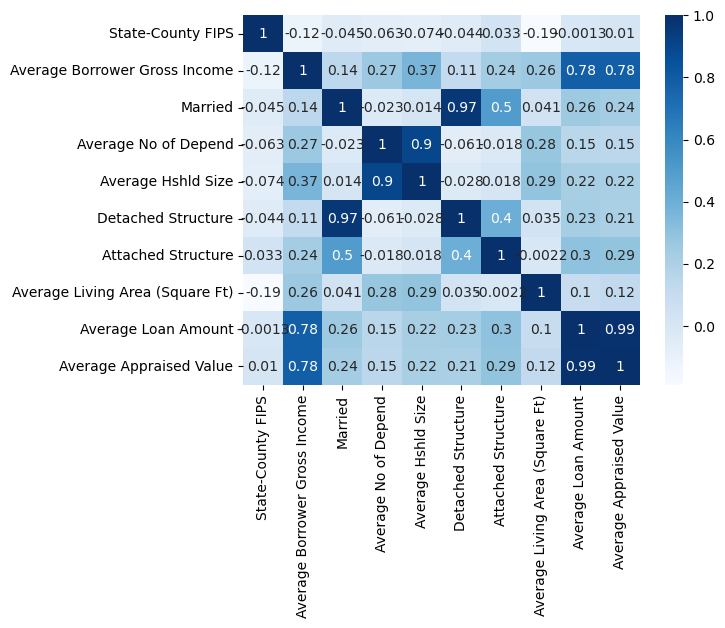

In [9]:
#create a heatmap to see the correlation of the data
corr = usda.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

In [10]:
#fit the data and drop the Average Appraised Value column to use as the dataset to predict
X = usda.drop('Average Appraised Value',axis=1)

y = usda['Average Appraised Value']

#create your test_test_spit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [11]:
#scale the data
usda_scaler = StandardScaler().fit_transform(usda[['Average Borrower Gross Income', 'Married',
       'Average No of Depend', 'Average Hshld Size', 'Detached Structure',
       'Attached Structure', 'Average Living Area (Square Ft)',
       'Average Loan Amount', 'Average Appraised Value']])

#transform the data
usda_transformed = pd.DataFrame(usda_scaler, columns=['Average Borrower Gross Income', 'Married',
       'Average No of Depend', 'Average Hshld Size', 'Detached Structure',
       'Attached Structure', 'Average Living Area (Square Ft)',
       'Average Loan Amount', 'Average Appraised Value'])
                                
usda_transformed.head()            

,Average Borrower Gross Income,Married,Average No of Depend,Average Hshld Size,Detached Structure,Attached Structure,Average Living Area (Square Ft),Average Loan Amount,Average Appraised Value
0,0.356260,-0.384882,-0.097198,-0.394736,-0.386668,-0.223774,0.782946,0.679491,0.658622
1,0.330976,2.390020,-0.385225,-0.183773,2.339514,0.032557,1.205677,0.460783,0.413798
2,-0.730244,-0.538768,0.190829,-0.394736,-0.522734,-0.245135,0.307375,-0.290056,-0.265512
3,0.144136,-0.474235,-0.385225,-0.394736,-0.481428,-0.223774,-0.247458,-0.111155,-0.093238
4,0.048353,0.697280,-0.385225,-0.394736,0.662985,-0.074248,-0.078366,0.034329,0.020704


In [12]:
#show info
usda_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Average Borrower Gross Income    3150 non-null   float64
 1   Married                          3150 non-null   float64
 2   Average No of Depend             3150 non-null   float64
 3   Average Hshld Size               3150 non-null   float64
 4   Detached Structure               3150 non-null   float64
 5   Attached Structure               3150 non-null   float64
 6   Average Living Area (Square Ft)  3150 non-null   float64
 7   Average Loan Amount              3150 non-null   float64
 8   Average Appraised Value          3150 non-null   float64
dtypes: float64(9)
memory usage: 221.6 KB


In [13]:
#import libraries
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [14]:
usda_scaler = StandardScaler()

# Fit the scaler on the training data
usda_scaler.fit(X_train)

# Transform the training and testing data using the scaler
X_train_scaled = usda_scaler.transform(X_train)
X_test_scaled = usda_scaler.transform(X_test)

In [15]:
lasso = Lasso()

lasso.fit(X_train, y_train)

Lasso()

In [16]:
#create y prediction
y_predict = lasso.predict(X_test)

In [17]:
#find mean absolute error
mean_absolute_error(y_test, y_predict)

2541.24744327177

In [18]:
#find mean squared error
mean_squared_error(y_test, y_predict)

30323959.01151926

In [19]:
#find r2 score
r2_score(y_test, y_predict)

0.9820598959145211

In [20]:
#create parameters
param = {'alpha' :[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,40,50,100, 1000, 10000]}

In [21]:
lasso_cv = GridSearchCV(lasso, param, cv=3, n_jobs=-1)

In [22]:
lasso_cv.fit(X_train, y_train)

/Users/ikaikasmith/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.108e+10, tolerance: 2.826e+08
  model = cd_fast.enet_coordinate_descent(
/Users/ikaikasmith/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.102e+10, tolerance: 2.826e+08
  model = cd_fast.enet_coordinate_descent(
/Users/ikaikasmith/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features

GridSearchCV(cv=3, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 40, 50, 100, 1000, 10000]})

In [23]:
#creat another y prediction with new paramaters in place
y_predict2 = lasso_cv.predict(X_test)

In [24]:
##find mean absolute error with new parameters
mean_absolute_error(y_test, y_predict2)

2544.8570332208924

In [25]:
##find mean squared error with new parameters
mean_squared_error(y_test, y_predict2)

30119366.788132127

In [26]:
##find r2 score with new parameters
r2_score(y_test, y_predict2)

0.982180935709531

In [27]:
lasso_cv.best_estimator_

Lasso(alpha=10000)

In [28]:
lasso2 = Lasso(alpha=10000)

In [29]:
lasso2.fit(X_train, y_train)

Lasso(alpha=10000)

In [30]:
lasso2.intercept_

-5972.80568652504

In [31]:
lasso2.coef_

array([ 0.04873958,  0.10192434, -0.07800481, -0.        , -0.        ,
       -1.58532093, -0.        ,  2.75928028,  0.98932968])

In [32]:
#show coefficients
coef_dict_baseline = {}
for coef, feat in zip(lasso.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline    

{'State-County FIPS': 0.04935930311741871,
 'Average Borrower Gross Income': 0.13392903116095664,
 'Married': 0.16368771713215127,
 'Average No of Depend': 922.8542757923409,
 'Average Hshld Size': -2110.854895601651,
 'Detached Structure': -1.7420720226672533,
 'Attached Structure': -2.738648483182993,
 'Average Living Area (Square Ft)': 3.7731743099134185,
 'Average Loan Amount': 0.9886982963988595}

In [33]:
ridge = Ridge()

ridge.fit(X_train, y_train)

Ridge()

In [34]:
#create y prediction
y_predict = ridge.predict(X_test)

In [35]:
#find mean absolute error
mean_absolute_error(y_test, y_predict)

2541.3218970440203

In [36]:
#find mean squared error
mean_squared_error(y_test, y_predict)

30330008.11990739

In [37]:
#find r2 score
r2_score(y_test, y_predict)

0.9820563171722445

In [38]:
#create parameters
param = {'alpha' :[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,40,50,100, 1000, 10000]}

In [39]:
ridge_cv = GridSearchCV(ridge, param, cv=3, n_jobs=-1)

In [40]:
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 40, 50, 100, 1000, 10000]})

In [41]:
#creat another y prediction with new paramaters in place
y_predict2 = ridge_cv.predict(X_test)

In [42]:
#find mean absolute error with new parameters
mean_absolute_error(y_test, y_predict2)

2533.850056408608

In [43]:
#find mean squared error with new parameters
mean_squared_error(y_test, y_predict2)

29914683.108863965

In [44]:
#find r2 score with new parameters
r2_score(y_test, y_predict2)

0.9823020296111972

In [45]:
ridge_cv.best_estimator_

Ridge(alpha=1000)

In [46]:
ridge2 = Lasso(alpha=10000)

In [47]:
ridge2.fit(X_train, y_train)

Lasso(alpha=10000)

In [48]:
ridge2.intercept_

-5972.80568652504

In [49]:
ridge2.coef_

array([ 0.04873958,  0.10192434, -0.07800481, -0.        , -0.        ,
       -1.58532093, -0.        ,  2.75928028,  0.98932968])

In [50]:
#show coefficients
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline 

{'State-County FIPS': 0.04936141042253702,
 'Average Borrower Gross Income': 0.13409004943603908,
 'Married': 0.16714444297289419,
 'Average No of Depend': 955.0217016611873,
 'Average Hshld Size': -2133.3912419800718,
 'Detached Structure': -1.742752704870281,
 'Attached Structure': -2.738729005190161,
 'Average Living Area (Square Ft)': 3.771864275867766,
 'Average Loan Amount': 0.9886823870896991}

In [51]:
#create lasso and ridge predctions using X-test so they can be used on a distplot
predict_lasso = lasso2.predict(X_test)
predict_ridge = ridge2.predict(X_test)

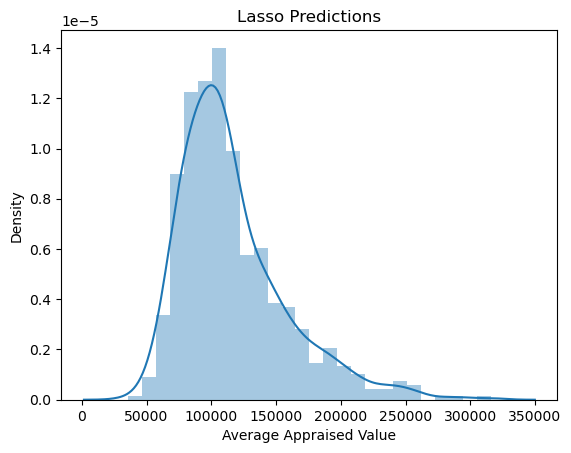

In [52]:
#create a distplot using lasso predictions and Average Appraised Values
sns.distplot(predict_lasso)
plt.xlabel('Average Appraised Value')
plt.title('Lasso Predictions')
plt.show()

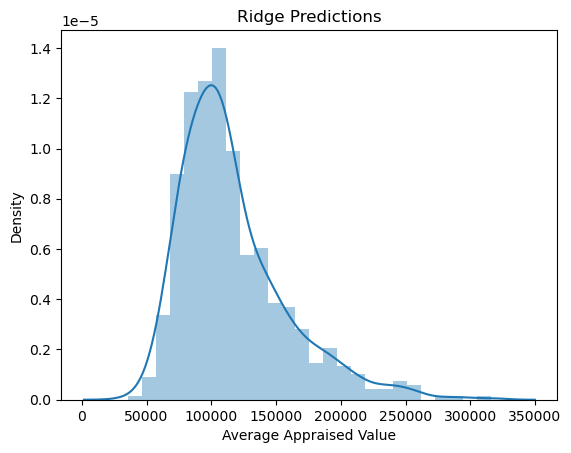

In [53]:
#create a displot using ridge predictions and Average Appraised Values
sns.distplot(predict_ridge)
plt.xlabel('Average Appraised Value')
plt.title('Ridge Predictions')
plt.show()

In [54]:
names = usda.drop('Average Appraised Value',axis=1).columns

print(names)

Index(['State-County FIPS', 'Average Borrower Gross Income', 'Married',
       'Average No of Depend', 'Average Hshld Size', 'Detached Structure',
       'Attached Structure', 'Average Living Area (Square Ft)',
       'Average Loan Amount'],
      dtype='object')


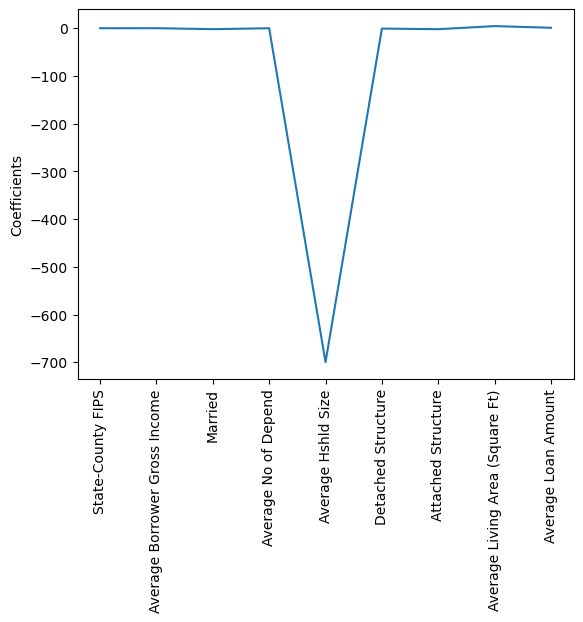

In [55]:
#plot the lasso coeffecients against the variables
lasso = Lasso(alpha=100)
lasso_coef = lasso.fit(X, y).coef_

plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names, rotation=90)
plt.ylabel("Coefficients")
plt.show()

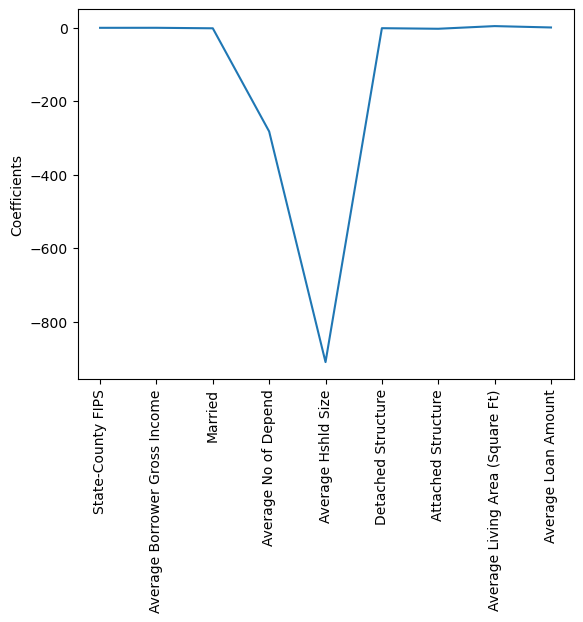

In [56]:
#plot the ridge coeffecients against the variables
ridge = Ridge(alpha=100)
ridge_coef = ridge.fit(X, y).coef_

plt.plot(range(len(names)), ridge_coef)
plt.xticks(range(len(names)), names, rotation=90)
plt.ylabel("Coefficients")
plt.show()

<Figure size 3000x600 with 0 Axes>

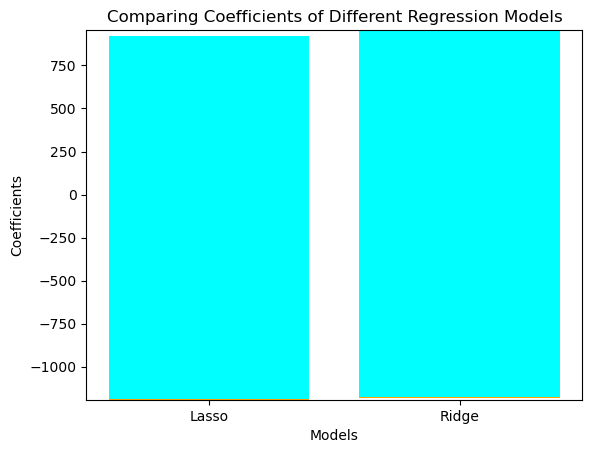

In [57]:
plt.figure(figsize=(30,6))
x = ['Lasso', 'Ridge']
y1 = np.array([0.04935930311741871, 0.04936141042253702,])
y2 = np.array([0.13392903116095664, 0.13409004943603908])
y3 = np.array([0.16368771713215127, 0.16714444297289419])
y4 = np.array([922.8542757923409, 955.0217016611873])
y5 = np.array([-2110.854895601651, -2133.3912419800718])
y6 = np.array([-1.7420720226672533, -1.742752704870281])
y7 = np.array([-2.738648483182993, -2.738729005190161])
y8 = np.array([3.7731743099134185, 3.771864275867766])               
y9 = np.array([0.9886982963988595, 0.9886823870896991])
              
fig, axes = plt.subplots(ncols=1, nrows=1)
plt.bar(x, y1, color = 'black')
plt.bar(x, y2, bottom=y1, color='blue')
plt.bar(x, y3, bottom=y1+y2, color='green')
plt.bar(x, y4, bottom=y1+y2+y3, color='red')
plt.bar(x, y5, bottom=y1+y2+y3+y4, color='cyan')
plt.bar(x, y6, bottom=y1+y2+y3+y4+y5, color='pink')              
plt.bar(x, y7, bottom=y1+y2+y3+y4+y5+y6, color='brown') 
plt.bar(x, y8, bottom=y1+y2+y3+y4+y5+y6+y7, color='orange')          
plt.bar(x, y9, bottom=y1+y2+y3+y4+y5+y6+y7+y8, color='y')               
              
plt.xlabel("Models")
plt.ylabel("Coefficients")
plt.title("Comparing Coefficients of Different Regression Models")
axes.set_xticklabels(['Lasso', 'Ridge'])
plt.show()